# The IMDB dataset

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 

import numpy as np

from keras.datasets import reuters
from keras import models, layers
from keras.utils import to_categorical

/home/leo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data,train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

In [4]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [5]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [6]:
x_val = x_train[:1000]
x_train = x_train[1000:]
y_val = y_train[:1000]
y_train = y_train[1000:]

# Build model

In [7]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2990      
Total params: 647,214
Trainable params: 647,214
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 95us/step - loss: 2.5306 - acc: 0.4962 - val_loss: 1.7180 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 95us/step - loss: 1.4430 - acc: 0.6879 - val_loss: 1.3437 - val_acc: 0.7070
Epoch 3/20
7982/7982 [==============================] - 1s 93us/step - loss: 1.0932 - acc: 0.7660 - val_loss: 1.1704 - val_acc: 0.7420
Epoch 4/20
7982/7982 [==============================] - 1s 96us/step - loss: 0.8682 - acc: 0.8165 - val_loss: 1.0791 - val_acc: 0.7600
Epoch 5/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.7020 - acc: 0.8479 - val_loss: 0.9840 - val_acc: 0.7830
Epoch 6/20
7982/7982 [==============================] - 1s 94us/step - loss: 0.5667 - acc: 0.8795 - val_loss: 0.9400 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.4596 - acc: 0.9034 - val_loss: 0.9079 - val_acc: 0.8000
Epoch 8

# Visualize

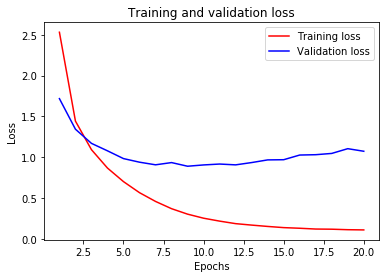

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

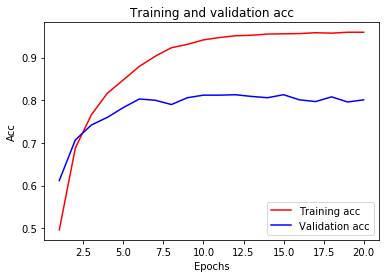

In [11]:
plt.clf()
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()


In [12]:
result = model.evaluate(x_test, y_test)
print('Testing Loss: {}'.format(result[0]))
print('Testing Accuracy: {}'.format(result[1]))

2246/2246 [==============================] - 0s 115us/step
Testing Loss: 1.2169348577888333
Testing Accuracy: 0.7778272484947504


# Smaller Layers

In [13]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 76us/step - loss: 2.8047 - acc: 0.5085 - val_loss: 2.1022 - val_acc: 0.5930
Epoch 2/20
7982/7982 [==============================] - 1s 64us/step - loss: 1.7800 - acc: 0.6458 - val_loss: 1.6062 - val_acc: 0.6580
Epoch 3/20
7982/7982 [==============================] - 1s 66us/step - loss: 1.3814 - acc: 0.7053 - val_loss: 1.3597 - val_acc: 0.6920
Epoch 4/20
7982/7982 [==============================] - 1s 67us/step - loss: 1.1490 - acc: 0.7511 - val_loss: 1.2342 - val_acc: 0.7230
Epoch 5/20
7982/7982 [==============================] - 1s 66us/step - loss: 0.9805 - acc: 0.7845 - val_loss: 1.1315 - val_acc: 0.7540
Epoch 6/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.8449 - acc: 0.8162 - val_loss: 1.0707 - val_acc: 0.7590
Epoch 7/20
7982/7982 [==============================] - 1s 65us/step - loss: 0.7317 - acc: 0.8404 - val_loss: 1.0202 - val_acc: 0.7800
Epoch 8

In [15]:
result = model.evaluate(x_test, y_test)
print('Testing Loss: {}'.format(result[0]))
print('Testing Accuracy: {}'.format(result[1]))

2246/2246 [==============================] - 0s 83us/step
Testing Loss: 1.123416835457113
Testing Accuracy: 0.7836153161706185


# Larger Layers

In [16]:
model = models.Sequential()
model.add(layers.Dense(128, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [17]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 143us/step - loss: 2.2277 - acc: 0.5549 - val_loss: 1.3908 - val_acc: 0.6900
Epoch 2/20
7982/7982 [==============================] - 1s 132us/step - loss: 1.1382 - acc: 0.7486 - val_loss: 1.1120 - val_acc: 0.7640
Epoch 3/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.7957 - acc: 0.8285 - val_loss: 0.9948 - val_acc: 0.7860
Epoch 4/20
7982/7982 [==============================] - 1s 130us/step - loss: 0.5750 - acc: 0.8816 - val_loss: 0.9600 - val_acc: 0.8010
Epoch 5/20
7982/7982 [==============================] - 1s 128us/step - loss: 0.4244 - acc: 0.9099 - val_loss: 0.8819 - val_acc: 0.8280
Epoch 6/20
7982/7982 [==============================] - 1s 127us/step - loss: 0.3165 - acc: 0.9334 - val_loss: 0.9642 - val_acc: 0.8030
Epoch 7/20
7982/7982 [==============================] - 1s 129us/step - loss: 0.2524 - acc: 0.9426 - val_loss: 0.8493 - val_acc: 0.8240


In [18]:
result = model.evaluate(x_test, y_test)
print('Testing Loss: {}'.format(result[0]))
print('Testing Accuracy: {}'.format(result[1]))

2246/2246 [==============================] - 0s 95us/step
Testing Loss: 1.268716528918843
Testing Accuracy: 0.7804986642920748


# One Hidden Layer

In [19]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

In [20]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 100us/step - loss: 2.6007 - acc: 0.5552 - val_loss: 1.8101 - val_acc: 0.6520
Epoch 2/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.4794 - acc: 0.7186 - val_loss: 1.3446 - val_acc: 0.7220
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0691 - acc: 0.7879 - val_loss: 1.1326 - val_acc: 0.7650
Epoch 4/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.8281 - acc: 0.8332 - val_loss: 1.0156 - val_acc: 0.7840
Epoch 5/20
7982/7982 [==============================] - 1s 86us/step - loss: 0.6619 - acc: 0.8697 - val_loss: 0.9383 - val_acc: 0.8000
Epoch 6/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.5391 - acc: 0.8914 - val_loss: 0.8826 - val_acc: 0.8230
Epoch 7/20
7982/7982 [==============================] - 1s 87us/step - loss: 0.4473 - acc: 0.9092 - val_loss: 0.8557 - val_acc: 0.8220
Epoch 

In [21]:
result = model.evaluate(x_test, y_test)
print('Testing Loss: {}'.format(result[0]))
print('Testing Accuracy: {}'.format(result[1]))

2246/2246 [==============================] - 0s 111us/step
Testing Loss: 1.0474414131201917
Testing Accuracy: 0.7996438112730229


# Three Hidden Layer

In [22]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)


In [23]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 106us/step - loss: 2.5329 - acc: 0.4728 - val_loss: 1.7123 - val_acc: 0.5850
Epoch 2/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.4275 - acc: 0.6824 - val_loss: 1.3123 - val_acc: 0.6890
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.0797 - acc: 0.7562 - val_loss: 1.1533 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 95us/step - loss: 0.8571 - acc: 0.8091 - val_loss: 1.0591 - val_acc: 0.7610
Epoch 5/20
7982/7982 [==============================] - 1s 88us/step - loss: 0.6752 - acc: 0.8435 - val_loss: 1.0063 - val_acc: 0.7740
Epoch 6/20
7982/7982 [==============================] - 1s 92us/step - loss: 0.5505 - acc: 0.8696 - val_loss: 0.9996 - val_acc: 0.7830
Epoch 7/20
7982/7982 [==============================] - 1s 93us/step - loss: 0.4299 - acc: 0.9055 - val_loss: 0.9805 - val_acc: 0.8000
Epoch 

In [24]:
result = model.evaluate(x_test, y_test)
print('Testing Loss: {}'.format(result[0]))
print('Testing Accuracy: {}'.format(result[1]))

2246/2246 [==============================] - 0s 128us/step
Testing Loss: 1.451758452429903
Testing Accuracy: 0.7502226180406096
